# (Archive for imports)

In [3]:
# from datetime import datetime
# from matplotlib import dates
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from statsmodels.tsa.statespace.tools import diff
# from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
# from pandas.plotting import lag_plot
# from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
# from pmdarima import auto_arima
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Standard imports 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [2]:
cd C:\Users\tammo\OneDrive\Desktop\FC

C:\Users\tammo\OneDrive\Desktop\FC


In [3]:
pwd

'C:\\Users\\tammo\\OneDrive\\Desktop\\FC'

In [18]:
# WITHOUT INDEX COLUMN 
df = pd.read_excel(r'C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\forecast-challenge\data\q4_2017.xlsx',index_col=None, header=1).drop('Unnamed: 0',axis=1)

In [19]:
df.head()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
0,Product_19,201813,13,201752,176316,NaN
1,Product_20,201813,13,201752,516510,NaN
2,Product_22,201813,13,201752,237587,NaN
3,Product_30,201813,13,201752,393741,NaN
4,Product_39,201813,13,201752,92112,NaN


In [20]:
# WITH INDEX COLUMN
# df = pd.read_excel('Daten_ForecastingChallenge - Q42017.xlsx',index_col=2).drop('Unnamed: 0',axis=1)

# Transform week number into an isodate, set column 'isodate' as index

In [20]:
df['isodate'] = df[['Due_date']].apply(lambda x: dt.datetime.strptime(str(x['Due_date'])+'-1', "%Y%W-%w"),axis=1)

In [21]:
df.set_index(['isodate'],inplace=True)

In [22]:
df.index = pd.DatetimeIndex(df.index).to_period('W')

In [ ]:
# TO CUSTOMIZE AND APPLY!

# Set "date" to be the index
# df.set_index('date',inplace=True)
# df.index.freq = 'MS'
# df.head()

In [9]:
# df.index.freq = 'W' # Weekly frequency

In [23]:
# SHOW HEAD VALUES FOR 2014
df.head()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2018-03-26/2018-04-01,Product_19,201813,13,201752,176316,NaN
2018-03-26/2018-04-01,Product_20,201813,13,201752,516510,NaN
2018-03-26/2018-04-01,Product_22,201813,13,201752,237587,NaN
2018-03-26/2018-04-01,Product_30,201813,13,201752,393741,NaN
2018-03-26/2018-04-01,Product_39,201813,13,201752,92112,NaN


# Prepare Data

## Only selected certain product and drop duplicates

In [338]:
len(df)

27064

In [137]:
df19 = df[df['Sp_number']=='Product_19']
df20 = df[df['Sp_number']=='Product_20']
df22 = df[df['Sp_number']=='Product_22']
df30 = df[df['Sp_number']=='Product_30']
df39 = df[df['Sp_number']=='Product_39']
df48 = df[df['Sp_number']=='Product_48']
df50 = df[df['Sp_number']=='Product_50']
df55 = df[df['Sp_number']=='Product_55']
df57 = df[df['Sp_number']=='Product_57']
df67 = df[df['Sp_number']=='Product_67']

In [47]:
df19[df19['Billing'].isna()]

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2018-03-26/2018-04-01,Product_19,201813,13,201752,176316,NaN
2018-03-19/2018-03-25,Product_19,201812,13,201751,345894,NaN
2018-03-19/2018-03-25,Product_19,201812,12,201752,337246,NaN
2018-03-12/2018-03-18,Product_19,201811,13,201750,256438,NaN
2018-03-12/2018-03-18,Product_19,201811,12,201751,264364,NaN
...,...,...,...,...,...,...
2018-01-01/2018-01-07,Product_19,201801,6,201747,347577,NaN
2018-01-01/2018-01-07,Product_19,201801,5,201748,346577,NaN
2018-01-01/2018-01-07,Product_19,201801,3,201750,370167,NaN


In [55]:
df_ = df19[:'2018-01-01/2018-01-07']

In [56]:
df_

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2018-03-26/2018-04-01,Product_19,201813,13,201752,176316,NaN
2018-03-19/2018-03-25,Product_19,201812,13,201751,345894,NaN
2018-03-19/2018-03-25,Product_19,201812,12,201752,337246,NaN
2018-03-12/2018-03-18,Product_19,201811,13,201750,256438,NaN
2018-03-12/2018-03-18,Product_19,201811,12,201751,264364,NaN
...,...,...,...,...,...,...
2018-01-01/2018-01-07,Product_19,201801,6,201747,347577,NaN
2018-01-01/2018-01-07,Product_19,201801,5,201748,346577,NaN
2018-01-01/2018-01-07,Product_19,201801,3,201750,370167,NaN


In [87]:
df_ = df19[:'2018-01-01/2018-01-07']
dates = df_.index.unique()
# print(len(dates),dates)
horizons = df_.Fc_horizon.unique()
counter = 13
data = {}
for date in dates:
    forecast = df_.Fc_and_order.loc[(df_.Fc_horizon == counter) & (df_.index == date)].values.tolist()
    print(forecast, counter, date)
    counter-=1
    data[date] = forecast
#     if date not in data:
#         data[date] = []
#     data[date].append(forecast)

[176316] 13 2018-03-26/2018-04-01
[337246] 12 2018-03-19/2018-03-25
[266735] 11 2018-03-12/2018-03-18
[274827] 10 2018-03-05/2018-03-11
[130324] 9 2018-02-26/2018-03-04
[201536] 8 2018-02-19/2018-02-25
[308403] 7 2018-02-12/2018-02-18
[230076] 6 2018-02-05/2018-02-11
[232840] 5 2018-01-29/2018-02-04
[171024] 4 2018-01-22/2018-01-28
[505083] 3 2018-01-15/2018-01-21
[211767] 2 2018-01-08/2018-01-14
[380986] 1 2018-01-01/2018-01-07


In [129]:
pd.concat([df__, ])

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2018-01-01/2018-01-07,Product_19,201801,1,201752,380986,0.0
2017-12-25/2017-12-31,Product_19,201752,1,201751,182723,301000.0
2017-12-18/2017-12-24,Product_19,201751,1,201750,194600,224000.0
2017-12-04/2017-12-10,Product_19,201749,1,201748,328866,316000.0
2017-11-27/2017-12-03,Product_19,201748,1,201747,183804,234000.0
...,...,...,...,...,...,...
2014-02-03/2014-02-09,Product_19,201405,1,201404,126028,269000.0
2014-01-27/2014-02-02,Product_19,201404,1,201403,206085,207000.0
2014-01-20/2014-01-26,Product_19,201403,1,201402,449633,459000.0


In [88]:
data

{Period('2018-03-26/2018-04-01', 'W-SUN'): [176316],
 Period('2018-03-19/2018-03-25', 'W-SUN'): [337246],
 Period('2018-03-12/2018-03-18', 'W-SUN'): [266735],
 Period('2018-03-05/2018-03-11', 'W-SUN'): [274827],
 Period('2018-02-26/2018-03-04', 'W-SUN'): [130324],
 Period('2018-02-19/2018-02-25', 'W-SUN'): [201536],
 Period('2018-02-12/2018-02-18', 'W-SUN'): [308403],
 Period('2018-02-05/2018-02-11', 'W-SUN'): [230076],
 Period('2018-01-29/2018-02-04', 'W-SUN'): [232840],
 Period('2018-01-22/2018-01-28', 'W-SUN'): [171024],
 Period('2018-01-15/2018-01-21', 'W-SUN'): [505083],
 Period('2018-01-08/2018-01-14', 'W-SUN'): [211767],
 Period('2018-01-01/2018-01-07', 'W-SUN'): [380986]}

In [140]:
df19["NEW"] = df__['Billing']

In [188]:

df_ = df19[:'2018-01-01/2018-01-07']
dates = df_.index.unique()
# print(len(dates),dates)
horizons = df_.Fc_horizon.unique()
counter = 13
data = {}
for date in dates:
    forecast = df_.Fc_and_order.loc[(df_.Fc_horizon == counter) & (df_.index == date)].values.tolist()
    #     print(forecast, counter, date)
    counter-=1
    data[date] = forecast
df__ = pd.DataFrame.from_dict(data, orient='index', columns=['Forecast_NEW'])
df19["NEW"] = df__['Forecast_NEW']
df1 = df19.loc[df19['Fc_horizon'] == 1]
df_new = df19[df19['NEW'].notna()].drop_duplicates(subset=['Fc_horizon'])
df_conc = pd.concat([df1,df_new])
df_conc.sort_index(ascending=False, inplace=True)
df_conc['Fc_and_order'][df_conc['NEW'].notna()] = 0
df_conc['NEW'][df_conc['NEW'].isna()] = 0
# df_conc[df_conc['Billing'].isna()] = 0
df_conc['Forecast'] = df_conc["Fc_and_order"] + df_conc['NEW']
df_conc

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing,NEW,Forecast
isodate,,,,,,,,
2018-03-26/2018-04-01,Product_19,201813,13,201752,0,NaN,176316.0,176316.0
2018-03-19/2018-03-25,Product_19,201812,12,201752,0,NaN,337246.0,337246.0
2018-03-12/2018-03-18,Product_19,201811,11,201752,0,NaN,266735.0,266735.0
2018-03-05/2018-03-11,Product_19,201810,10,201752,0,NaN,274827.0,274827.0
2018-02-26/2018-03-04,Product_19,201809,9,201752,0,NaN,130324.0,130324.0
...,...,...,...,...,...,...,...,...
2014-02-03/2014-02-09,Product_19,201405,1,201404,126028,269000.0,0.0,126028.0
2014-01-27/2014-02-02,Product_19,201404,1,201403,206085,207000.0,0.0,206085.0
2014-01-20/2014-01-26,Product_19,201403,1,201402,449633,459000.0,0.0,449633.0


In [189]:
def calculate_forecast(df):
    '''
    calculates forecasted values for the last 13 weeks specially for SARIMAX
    input: df with columns Fc_horizon, Fc_and_Order. Index format is ...
    output: df with an additional column Forecast
    '''
    df_ = df[:'2018-01-01/2018-01-07'].copy()
    dates = df_.index.unique()
    # print(len(dates),dates)
    horizons = df_.Fc_horizon.unique()
    counter = 13
    data = {}
    
    for date in dates:
        forecast = df_.Fc_and_order.loc[(df_.Fc_horizon == counter) & (df_.index == date)].values.tolist()
        counter-=1
        data[date] = forecast
        
    df__ = pd.DataFrame.from_dict(data, orient='index', columns=['Forecast_NEW'])
    df["NEW"] = df__['Forecast_NEW']
    df1 = df.loc[df['Fc_horizon'] == 1]
    df_new = df[df['NEW'].notna()].drop_duplicates(subset=['Fc_horizon'])
    df_conc = pd.concat([df1,df_new])
    df_conc.sort_index(ascending=False, inplace=True)
    df_conc['Fc_and_order'][df_conc['NEW'].notna()] = 0
    df_conc['NEW'][df_conc['NEW'].isna()] = 0
    # df_conc[df_conc['Billing'].isna()] = 0
    df_conc['Forecast'] = df_conc["Fc_and_order"] + df_conc['NEW']
    return df_conc[['Sp_number', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Forecast', 'Billing']]

In [190]:
calculate_forecast(df22)

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Forecast,Billing
isodate,,,,,,,
2018-03-26/2018-04-01,Product_22,201813,13,201752,0,237587.0,NaN
2018-03-19/2018-03-25,Product_22,201812,12,201752,0,267500.0,NaN
2018-03-12/2018-03-18,Product_22,201811,11,201752,0,391190.0,NaN
2018-03-05/2018-03-11,Product_22,201810,10,201752,0,468500.0,NaN
2018-02-26/2018-03-04,Product_22,201809,9,201752,0,178140.0,NaN
...,...,...,...,...,...,...,...
2014-02-03/2014-02-09,Product_22,201405,1,201404,78560,78560.0,142500.0
2014-01-27/2014-02-02,Product_22,201404,1,201403,96510,96510.0,177500.0
2014-01-20/2014-01-26,Product_22,201403,1,201402,145072,145072.0,212500.0


In [100]:
print(df19.index)
print(df__.index)

PeriodIndex(['2018-01-01/2018-01-07', '2017-12-25/2017-12-31',
             '2017-12-18/2017-12-24', '2017-12-04/2017-12-10',
             '2017-11-27/2017-12-03', '2017-11-20/2017-11-26',
             '2017-11-13/2017-11-19', '2017-11-06/2017-11-12',
             '2017-10-30/2017-11-05', '2017-10-23/2017-10-29',
             ...
             '2014-03-10/2014-03-16', '2014-03-03/2014-03-09',
             '2014-02-24/2014-03-02', '2014-02-17/2014-02-23',
             '2014-02-10/2014-02-16', '2014-02-03/2014-02-09',
             '2014-01-27/2014-02-02', '2014-01-20/2014-01-26',
             '2014-01-13/2014-01-19', '2014-01-06/2014-01-12'],
            dtype='period[W-SUN]', name='isodate', length=203)
PeriodIndex(['2018-03-26/2018-04-01', '2018-03-19/2018-03-25',
             '2018-03-12/2018-03-18', '2018-03-05/2018-03-11',
             '2018-02-26/2018-03-04', '2018-02-19/2018-02-25',
             '2018-02-12/2018-02-18', '2018-02-05/2018-02-11',
             '2018-01-29/2018-02-04',

In [98]:
df__ + df19

,Billing,Due_date,Fc_and_order,Fc_date,Fc_horizon,Sp_number
2014-01-06/2014-01-12,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-13/2014-01-19,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-20/2014-01-26,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-27/2014-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-03/2014-02-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018-02-26/2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05/2018-03-11,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12/2018-03-18,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-19/2018-03-25,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
pd.concat([df19, df__], axis=0)

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
2018-01-01/2018-01-07,Product_19,201801.0,1.0,201752.0,380986.0,NaN
2017-12-25/2017-12-31,Product_19,201752.0,1.0,201751.0,182723.0,301000.0
2017-12-18/2017-12-24,Product_19,201751.0,1.0,201750.0,194600.0,224000.0
2017-12-04/2017-12-10,Product_19,201749.0,1.0,201748.0,328866.0,316000.0
2017-11-27/2017-12-03,Product_19,201748.0,1.0,201747.0,183804.0,234000.0
...,...,...,...,...,...,...
2018-01-29/2018-02-04,NaN,NaN,NaN,NaN,NaN,232840.0
2018-01-22/2018-01-28,NaN,NaN,NaN,NaN,NaN,171024.0
2018-01-15/2018-01-21,NaN,NaN,NaN,NaN,NaN,505083.0
2018-01-08/2018-01-14,NaN,NaN,NaN,NaN,NaN,211767.0


In [106]:
df19.Billing + df__.Billing

2014-01-06/2014-01-12   NaN
2014-01-13/2014-01-19   NaN
2014-01-20/2014-01-26   NaN
2014-01-27/2014-02-02   NaN
2014-02-03/2014-02-09   NaN
                         ..
2018-02-26/2018-03-04   NaN
2018-03-05/2018-03-11   NaN
2018-03-12/2018-03-18   NaN
2018-03-19/2018-03-25   NaN
2018-03-26/2018-04-01   NaN
Freq: W-SUN, Name: Billing, Length: 215, dtype: float64

In [80]:
df_[df_['Fc_horizon'] == 13]

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2018-03-26/2018-04-01,Product_19,201813,13,201752,176316,NaN
2018-03-19/2018-03-25,Product_19,201812,13,201751,345894,NaN
2018-03-12/2018-03-18,Product_19,201811,13,201750,256438,NaN
2018-02-26/2018-03-04,Product_19,201809,13,201748,120652,NaN
2018-02-19/2018-02-25,Product_19,201808,13,201747,263464,NaN
2018-02-12/2018-02-18,Product_19,201807,13,201746,273874,NaN
2018-02-05/2018-02-11,Product_19,201806,13,201745,258491,NaN
2018-01-29/2018-02-04,Product_19,201805,13,201744,249820,NaN
2018-01-22/2018-01-28,Product_19,201804,13,201743,225724,NaN


1 | 2018-01-01/2018-01-07
2 | 2018-01-01/2018-01-07 | 2018-01-08/2018-01-14
3 | 2018-01-01/2018-01-07 | 2018-01-08/2018-01-14 | 2018-01-15/2018-01-21

In [666]:
df19.tail()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2014-01-06/2014-01-12,Product_19,201401,5,201348,421559.0,209000.0
2014-01-06/2014-01-12,Product_19,201401,4,201349,425917.0,209000.0
2014-01-06/2014-01-12,Product_19,201401,3,201350,250756.0,209000.0
2014-01-06/2014-01-12,Product_19,201401,2,201351,244710.0,209000.0
2014-01-06/2014-01-12,Product_19,201401,1,201352,220834.0,209000.0


In [95]:
df19 = df19[df19['Fc_horizon']==1]
df20 = df20[df20['Fc_horizon']==1]
df22 = df22[df22['Fc_horizon']==1]
df30 = df30[df30['Fc_horizon']==1]
df39 = df39[df39['Fc_horizon']==1]
df48 = df48[df48['Fc_horizon']==1]
df50 = df50[df50['Fc_horizon']==1]
df55 = df55[df55['Fc_horizon']==1]
df57 = df57[df57['Fc_horizon']==1]
df67 = df67[df67['Fc_horizon']==1]

In [700]:
len(df19)

203

In [701]:
df19.tail()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2014-02-03/2014-02-09,Product_19,201405,1,201404,126028.0,269000.0
2014-01-27/2014-02-02,Product_19,201404,1,201403,206085.0,207000.0
2014-01-20/2014-01-26,Product_19,201403,1,201402,449633.0,459000.0
2014-01-13/2014-01-19,Product_19,201402,1,201401,262289.0,279997.0
2014-01-06/2014-01-12,Product_19,201401,1,201352,220834.0,209000.0


In [702]:
df19exo = df19
df20exo = df20
df22exo = df22
df30exo = df30
df39exo = df39
df48exo = df48
df50exo = df50
df55exo = df55
df57exo = df57
df67exo = df67

In [703]:
df19 = df19.dropna()
df20 = df20.dropna()
df22 = df22.dropna()
df30 = df30.dropna()
df39 = df39.dropna()
df48 = df48.dropna()
df50 = df50.dropna()
df55 = df55.dropna()
df57 = df57.dropna()
df67 = df67.dropna()

In [704]:
len(df19)

202

In [705]:
df19.tail()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2014-02-03/2014-02-09,Product_19,201405,1,201404,126028.0,269000.0
2014-01-27/2014-02-02,Product_19,201404,1,201403,206085.0,207000.0
2014-01-20/2014-01-26,Product_19,201403,1,201402,449633.0,459000.0
2014-01-13/2014-01-19,Product_19,201402,1,201401,262289.0,279997.0
2014-01-06/2014-01-12,Product_19,201401,1,201352,220834.0,209000.0


### Drop duplicates: Attention!

In [345]:
df19 = df19.drop_duplicates(['Billing'])
df20 = df20.drop_duplicates(['Billing'])
df22 = df22.drop_duplicates(['Billing'])
df30 = df30.drop_duplicates(['Billing'])
df39 = df39.drop_duplicates(['Billing'])
df48 = df48.drop_duplicates(['Billing'])
df50 = df50.drop_duplicates(['Billing'])
df55 = df55.drop_duplicates(['Billing'])
df57 = df57.drop_duplicates(['Billing'])
df67 = df67.drop_duplicates(['Billing'])

In [346]:
len(df19)

135

In [347]:
df.tail()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2014-01-06/2014-01-12,Product_67,201401,5,201348,543052,530000.0
2014-01-06/2014-01-12,Product_67,201401,4,201349,563778,530000.0
2014-01-06/2014-01-12,Product_67,201401,3,201350,503575,530000.0
2014-01-06/2014-01-12,Product_67,201401,2,201351,489937,530000.0
2014-01-06/2014-01-12,Product_67,201401,1,201352,489109,530000.0


In [348]:
df19.tail()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2014-03-17/2014-03-23,Product_19,201411,13,201350,190591,170000.0
2014-03-03/2014-03-09,Product_19,201409,13,201348,177902,227000.0
2014-02-10/2014-02-16,Product_19,201406,13,201345,496048,243000.0
2014-01-20/2014-01-26,Product_19,201403,13,201342,287652,459000.0
2014-01-13/2014-01-19,Product_19,201402,13,201341,216909,279997.0


→ Attention: Just Fc_horizon = 13 is kept in dataset, all the others are dropped

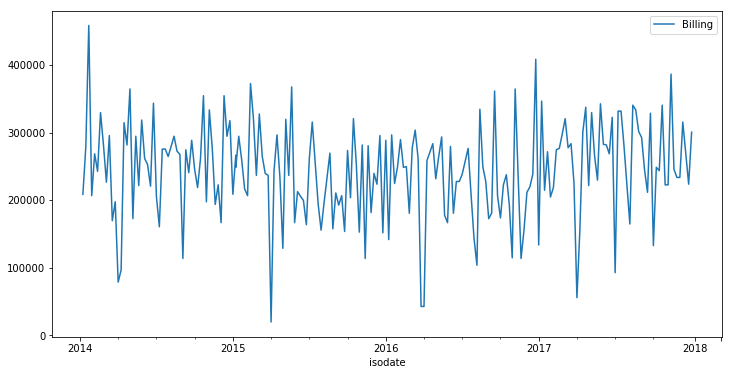

In [563]:
df19['Billing'].plot(figsize=(12,6),legend=True);

## Convert Fc_and_order into float

In [168]:
df19.columns

Index(['Sp_number', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order',
       'Billing'],
      dtype='object')

In [350]:
df['Fc_and_order'] = df['Fc_and_order'].astype(float)

In [351]:
df19['Fc_and_order'] = df19['Fc_and_order'].astype(float)

In [352]:
df19.tail()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2014-03-17/2014-03-23,Product_19,201411,13,201350,190591.0,170000.0
2014-03-03/2014-03-09,Product_19,201409,13,201348,177902.0,227000.0
2014-02-10/2014-02-16,Product_19,201406,13,201345,496048.0,243000.0
2014-01-20/2014-01-26,Product_19,201403,13,201342,287652.0,459000.0
2014-01-13/2014-01-19,Product_19,201402,13,201341,216909.0,279997.0


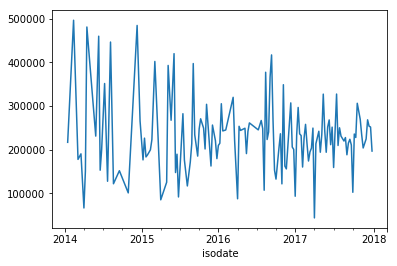

In [353]:
df19['Fc_and_order'].plot()

## Prepare data for Granger causality tests

In [174]:
granger1 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==1)].dropna()
granger2 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==2)].dropna()
granger3 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==3)].dropna()
granger4 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==4)].dropna()
granger5 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==5)].dropna()
granger6 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==6)].dropna()
granger7 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==7)].dropna()
granger8 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==8)].dropna()
granger9 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==9)].dropna()
granger10 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==10)].dropna()
granger11 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==11)].dropna()
granger12 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==12)].dropna()
granger13 = df[(df['Sp_number']=='Product_19') & (df['Fc_horizon']==13)].dropna()

In [159]:
len(granger1)

202

In [175]:
len(granger13)

203

# First glance at dataset

In [49]:
df19.tail()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
isodate,,,,,,
2014-03-17,Product_19,201411,13,201350,190591,170000.0
2014-03-03,Product_19,201409,13,201348,177902,227000.0
2014-02-10,Product_19,201406,13,201345,496048,243000.0
2014-01-20,Product_19,201403,13,201342,287652,459000.0
2014-01-13,Product_19,201402,13,201341,216909,279997.0


## Lag plot

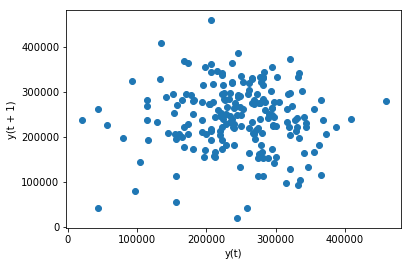

In [564]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(df19['Billing'])

Weak auto correlation (for Product_19).

## Month plot and quarter plot

In [216]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [243]:
len(df19)

135

In [356]:
# dfm = df19['Billing'].resample(rule='M').mean()
# month_plot(dfm);

# Only works without df.index = pd.DatetimeIndex(df.index).to_period('W') function

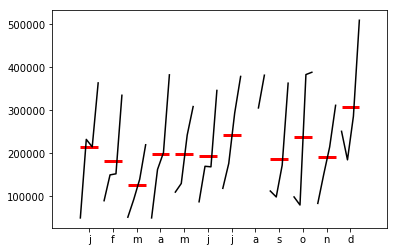

In [276]:
dfm = df50['Billing'].resample(rule='M').mean()
month_plot(dfm);

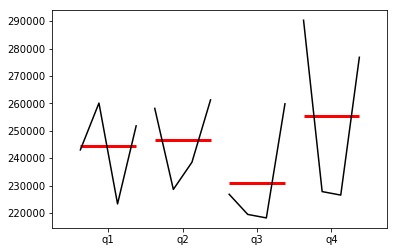

In [240]:
dfq = df19['Billing'].resample(rule='Q').mean()
quarter_plot(dfq);

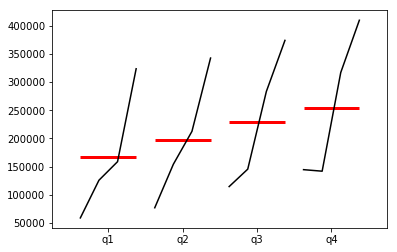

In [277]:
dfq = df50['Billing'].resample(rule='Q').mean()
quarter_plot(dfq);

→ There is indication for some seasonality in the data, although there is a lot of noise.

# Granger Causality Tests for Causality
### Here just for Product_19!

The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

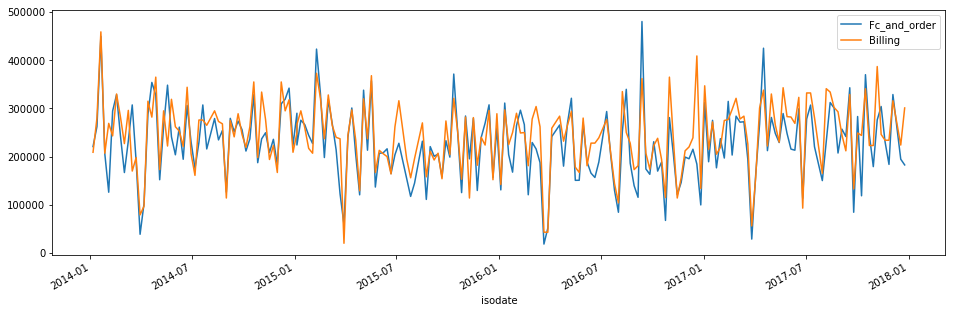

In [357]:
granger1[['Fc_and_order','Billing']].plot(figsize=(16,5));

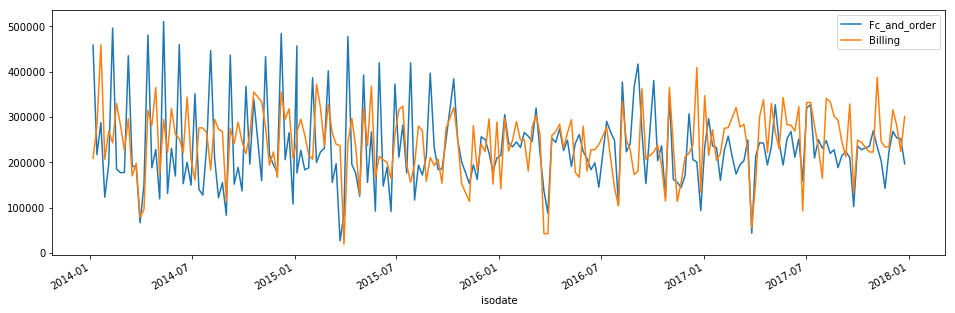

In [180]:
granger13[['Fc_and_order','Billing']].plot(figsize=(16,5));

Even from naked eye, it is evident that those forecasts with a one week horizont are way more precise than those with a 13 week horizont. This observation is to be proven mathematically through an RMSE analysis and Granger Causality tests.

## RMSE check between forecast horizont 1 and 13

In [359]:
from statsmodels.tools.eval_measures import rmse

error = rmse(granger1['Fc_and_order'],granger1['Billing'])

In [360]:
error

48014.07427128751

In [361]:
granger1['Billing'].mean()

243783.45544554456

In [364]:
from statsmodels.tools.eval_measures import rmse

error = rmse(granger13['Fc_and_order'],granger13['Billing'])

In [365]:
error

95836.70904240618

In [366]:
granger13['Billing'].mean()

244395.35960591133

## Granger causality tests

In [183]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(granger1[['Fc_and_order','Billing']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1936  , p=0.6604  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=0.1966  , p=0.6575  , df=1
likelihood ratio test: chi2=0.1965  , p=0.6576  , df=1
parameter F test:         F=0.1936  , p=0.6604  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1651  , p=0.1175  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=4.4412  , p=0.1085  , df=2
likelihood ratio test: chi2=4.3926  , p=0.1112  , df=2
parameter F test:         F=2.1651  , p=0.1175  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2427  , p=0.2955  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=3.8639  , p=0.2765  , df=3
likelihood ratio test: chi2=3.8269  , p=0.2808  , df=3
parameter F test:         F=1.2427  , p=0.2955  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4982  , p=0.2044  

Essentially we're looking for extremely low p-values, which we relatively have for lag=2. Further investigation is needed.

In [125]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(granger13[['Fc_and_order','Billing']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3334  , p=0.5647  , df_denom=131, df_num=1
ssr based chi2 test:   chi2=0.3410  , p=0.5592  , df=1
likelihood ratio test: chi2=0.3406  , p=0.5595  , df=1
parameter F test:         F=0.3334  , p=0.5647  , df_denom=131, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3623  , p=0.6968  , df_denom=128, df_num=2
ssr based chi2 test:   chi2=0.7528  , p=0.6863  , df=2
likelihood ratio test: chi2=0.7507  , p=0.6871  , df=2
parameter F test:         F=0.3623  , p=0.6968  , df_denom=128, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6295  , p=0.5973  , df_denom=125, df_num=3
ssr based chi2 test:   chi2=1.9941  , p=0.5736  , df=3
likelihood ratio test: chi2=1.9792  , p=0.5767  , df=3
parameter F test:         F=0.6295  , p=0.5973  , df_denom=125, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7266  , p=0.5754  

Essentially we're looking for extremely low p-values, which we do not see here for Product_19. This indicates that a forecast horizont of 13 weeks is not very precise in comparison to actual billing data.

# FORECASTING

In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

## Examine Seasonality

In [241]:
from statsmodels.tsa.seasonal import seasonal_decompose

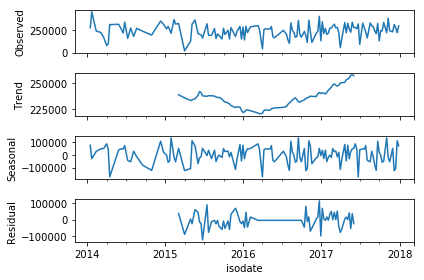

In [367]:
result = seasonal_decompose(df19['Billing'],model='add',freq=52)
result.plot();

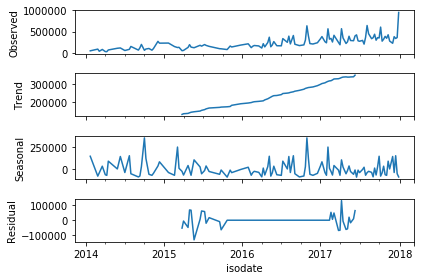

In [368]:
result = seasonal_decompose(df50['Billing'],model='add',freq=52)
result.plot();

## Dickey-Fuller Test for Stationarity – when stationary, choose ARMA, when non-stationary, choose ARIMA

In [255]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [369]:
adf_test(df19['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.195598e+01
p-value                 4.208908e-22
# lags used             0.000000e+00
# observations          1.340000e+02
critical value (1%)    -3.480119e+00
critical value (5%)    -2.883362e+00
critical value (10%)   -2.578407e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [370]:
adf_test(df50['Billing'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.127543
p-value                   0.946625
# lags used               8.000000
# observations          108.000000
critical value (1%)      -3.492401
critical value (5%)      -2.888697
critical value (10%)     -2.581255
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# Perform grid searches across various combinations of p, d, q values in order to obtain best-fit model (ARMA, ARIMA, SARIMA, SARIMAX)

Auto_arima flow chart: https://otexts.com/fpp2/arima-r.html

In [294]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
# help(auto_arima)

In [371]:
auto_arima(df19['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  135
Model:                     ARMA(0, 0)   Log Likelihood               -1710.506
Method:                           css   S.D. of innovations          76993.606
Date:                Wed, 25 May 2022   AIC                           3425.012
Time:                        13:57:38   BIC                           3430.823
Sample:                             0   HQIC                          3427.374
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.437e+05   6626.555     36.784      0.000    2.31e+05    2.57e+05
==============================================================================
"""

In [372]:
stepwise_fit = auto_arima(df19['Billing'],start_p=0,start_q=0,max_p=5,max_q=5,seasonal=False,trace=True)

Fit ARIMA: order=(0, 0, 0); AIC=3425.012, BIC=3430.823, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=3426.813, BIC=3435.528, Fit time=0.017 seconds
Fit ARIMA: order=(0, 0, 1); AIC=3426.785, BIC=3435.501, Fit time=0.013 seconds
Fit ARIMA: order=(1, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.054 seconds


C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


In [373]:
stepwise_fit.summary()

# All AICs for different parameters are shown; auto_arima automatically chooses parameters with lowest (best) AIC 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  135
Model:                     ARMA(0, 0)   Log Likelihood               -1710.506
Method:                           css   S.D. of innovations          76993.606
Date:                Wed, 25 May 2022   AIC                           3425.012
Time:                        13:58:01   BIC                           3430.823
Sample:                             0   HQIC                          3427.374
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.437e+05   6626.555     36.784      0.000    2.31e+05    2.57e+05
==============================================================================
"""

## Split dataset into train and test

In [566]:
train19 = df19['2017-09-30':]

In [567]:
test19 = df19[:'2017-09-30']

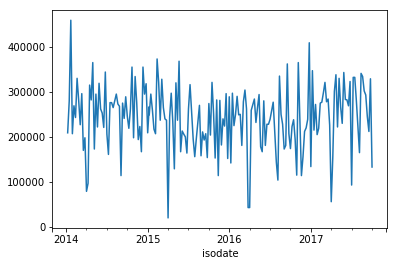

In [568]:
train19['Billing'].plot()

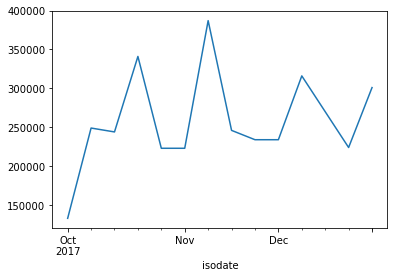

In [569]:
test19['Billing'].plot()

# Implement ARMA model

In [395]:
# train19.index = pd.DatetimeIndex(train19.index).to_period('W')

In [571]:
model = ARMA(train19['Billing'],order=(0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Billing   No. Observations:                  190
Model:                     ARMA(0, 0)   Log Likelihood               -2394.617
Method:                           css   S.D. of innovations          71991.941
Date:                Wed, 25 May 2022   AIC                           4793.234
Time:                        15:30:35   BIC                           4799.728
Sample:                    10-01-2017   HQIC                          4795.865
                         - 01-12-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.422e+05   5222.844     46.377      0.000    2.32e+05    2.52e+05
==============================================================================
"""

In [572]:
# start = len(train)
start = '2017-09-30'
# end = len(train) + len(test) - 1
end = '2017-12-31'
predictions = results.predict(start,end).rename('ARMA (0,0) Predictions')

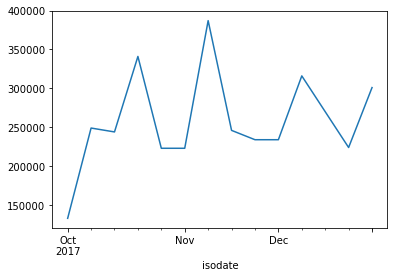

In [573]:
test19['Billing'].plot()

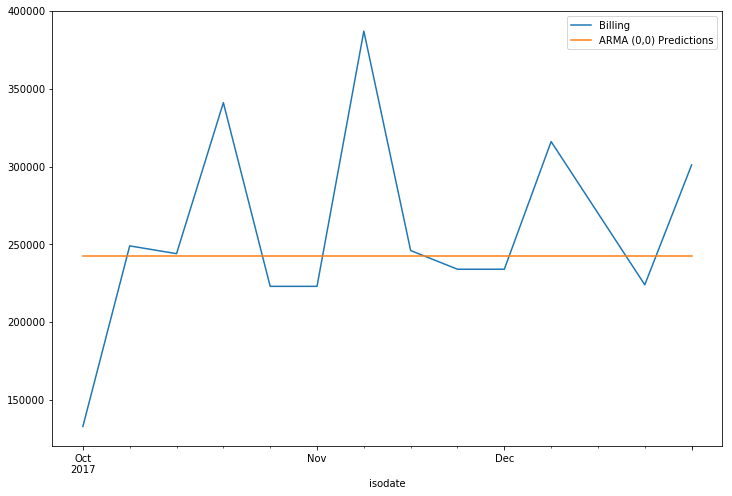

In [574]:
test19['Billing'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [575]:
test19['Billing'].mean()

258076.92307692306

In [576]:
predictions.mean()

242222.41052631574

# Implement ARIMA model

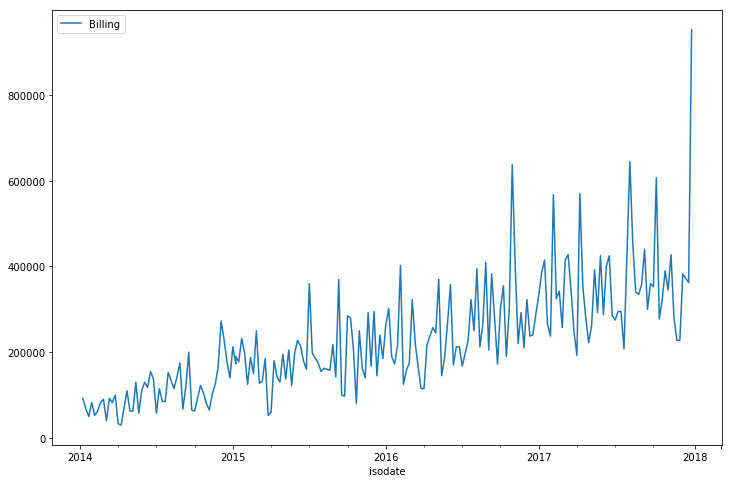

In [577]:
# Fathom seasonality
df50['Billing'].plot(figsize=(12,8),legend=True)

In [715]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df50['Billing'],model='add')
result.plot()

TypeError: PeriodIndex given. Check the `freq` attribute instead of using infer_freq.

In [580]:
from pmdarima import auto_arima

auto_arima(df50['Billing'],seasonal=False).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2575.272
Method:                       css-mle   S.D. of innovations          87570.484
Date:                Wed, 25 May 2022   AIC                           5156.544
Time:                        15:31:18   BIC                           5166.454
Sample:                             1   HQIC                          5160.554
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1665.6221    105.661    -15.764      0.000   -1872.714   -1458.530
ma.L1.D.y     -0.9999      0.014    -69.333      0.000      -1.028      -0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Theory: Compare parameter values from auto_arima() with ACF and PACF plots

In [581]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

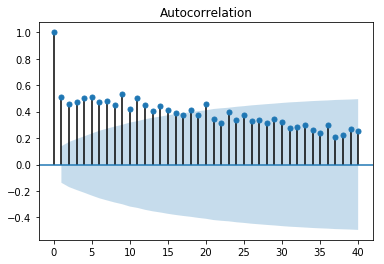

In [582]:
plot_acf(df50['Billing'],lags=40);

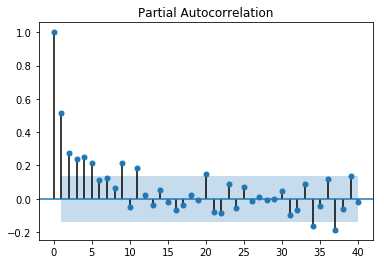

In [583]:
plot_pacf(df50['Billing'],lags=40);

Set model

In [584]:
stepwise_fit = auto_arima(df50['Billing'],start_p=0,start_q=0,max_p=5,max_q=5,seasonal=False,trace=True)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5269.998, BIC=5276.604, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5235.466, BIC=5245.376, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5156.544, BIC=5166.454, Fit time=0.083 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5158.525, BIC=5171.739, Fit time=0.126 seconds
Fit ARIMA: order=(0, 1, 2); AIC=5158.518, BIC=5171.731, Fit time=0.188 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5157.743, BIC=5174.260, Fit time=0.227 seconds
Total fit time: 0.647 seconds


C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  201
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2575.272
Method:                       css-mle   S.D. of innovations          87570.484
Date:                Wed, 25 May 2022   AIC                           5156.544
Time:                        15:31:33   BIC                           5166.454
Sample:                             1   HQIC                          5160.554
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1665.6221    105.661    -15.764      0.000   -1872.714   -1458.530
ma.L1.D.y     -0.9999      0.014    -69.333      0.000      -1.028      -0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Apply model (for test dataset)

In [585]:
train50 = df50['2017-09-30':]

In [586]:
test50 = df50[:'2017-09-30']

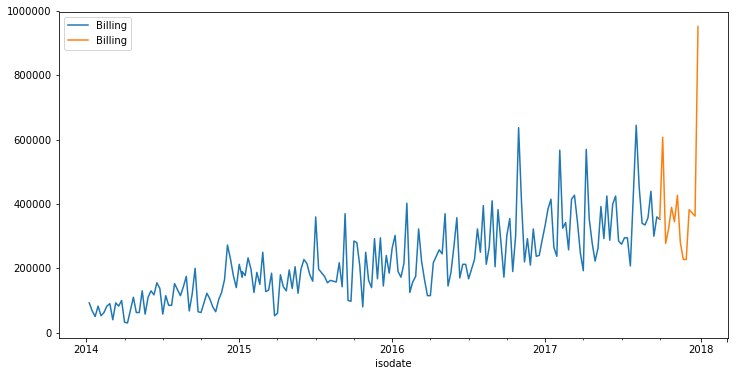

In [587]:
train50['Billing'].plot(figsize=(12,6),legend=True)
test50['Billing'].plot(legend=True)

In [588]:
model = ARIMA(train50['Billing'],order=(0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Billing   No. Observations:                  189
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2395.143
Method:                       css-mle   S.D. of innovations          76106.820
Date:                Wed, 25 May 2022   AIC                           4796.285
Time:                        15:31:56   BIC                           4806.011
Sample:                    09-24-2017   HQIC                          4800.225
                         - 01-12-2014                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1631.9869    100.668    -16.212      0.000   -1829.292   -1434.682
ma.L1.D.Billing    -1.0000      0.016    -63.866      0.000      -1.031      -0.969
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [589]:
# start = len(train)
start = '2017-09-30'
# end = len(train) + len(test) - 1
end = '2017-12-24'

In [590]:
predictions = results.predict(start,end).rename('ARIMA (0,1,1) Predictions')

Analyze predictions

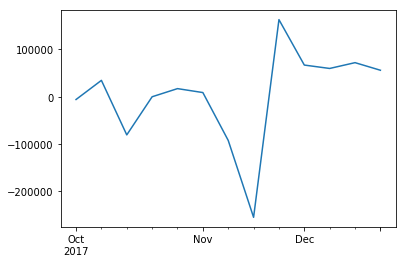

In [591]:
predictions.plot()

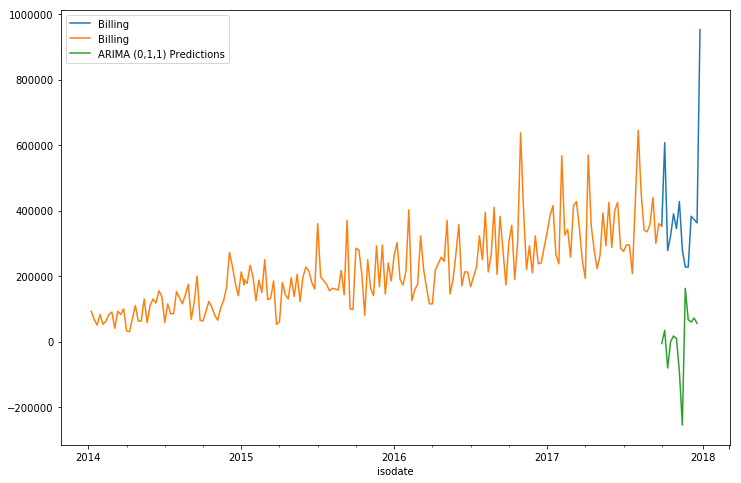

In [592]:
test50['Billing'].plot(legend=True,figsize=(12,8))
train50['Billing'].plot(legend=True)
predictions.plot(legend=True)

# Seasonal component was set False so predictions just show general trend with no seasonal part

In [465]:
from statsmodels.tools.eval_measures import rmse

In [472]:
error = rmse(test50['Billing'],predictions)

In [473]:
error # compare with Root Mean Squared Error below

463515.06104877515

In [474]:
test50['Billing'].mean() # compare with mean value above

405192.3076923077

Apply model for unknown future

In [597]:
len(df50)

202

In [610]:
model = ARIMA(df50['Billing'],order=(0,1,1))
results = model.fit()
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('ARIMA (0,1,1) FORECAST')

Plot forecast

In [611]:
len(fcast)

13

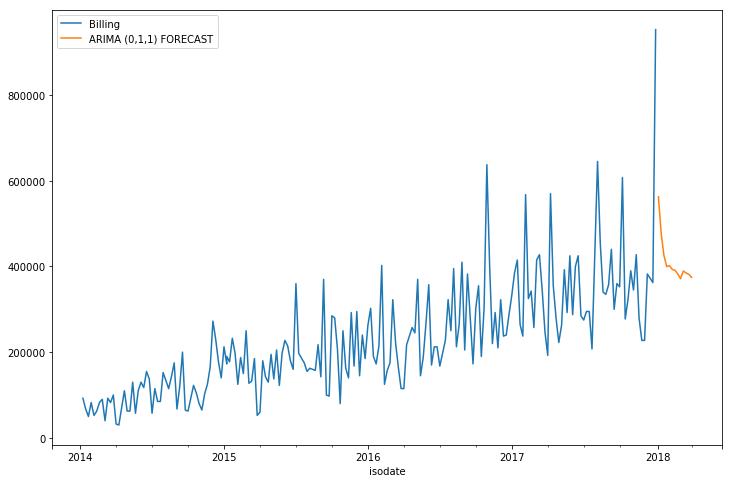

In [612]:
df50['Billing'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test50['Billing'],predictions)
error

# Implement SARIMA model

In [490]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

Check seasonality (m value of auto_arima to be seen from 'seasonal' plot from seasonal decompose plot

In [492]:
# result = seasonal_decompose(df50['Billing'],model='add')
# result.plot()
# result.seasonal.plot(figsize=(20,8))

Auto_arima()

In [613]:
auto_arima(df50['Billing'],seasonal=True,m=52).summary()
# warnings are to be expected and okay
# takes about 1 min

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 0, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning:

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2555.231
Date:                Wed, 25 May 2022   AIC                           5124.462
Time:                        15:37:12   BIC                           5147.585
Sample:                             0   HQIC                          5133.819
                                - 202                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5444.7075   1821.571     -2.989      0.003   -9014.921   -1874.494
ar.L1         -1.0488      0.078    -13.494      0.000      -1.201      -0.896
ar.L2         -0.2276      0.124     -1.841      0.066      -0.470       0.015
ar.L3         -0.1267      0.089     -1.420      0.156      -0.302       0.048
ma.L1          0.0727      0.120      0.605      0.545      -0.163       0.308
ma.L2         -0.9248      0.086    -10.739      0.000      -1.094      -0.756
sigma2      6.852e+09   2.85e-05    2.4e+14      0.000    6.85e+09    6.85e+09
===================================================================================
Ljung-Box (Q):                       55.75   Jarque-Bera (JB):                75.00
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.11e+31. Standard errors may be unstable.
"""

Test and train dataset

In [494]:
# test50 = df50['2017-09-30':]

In [495]:
# train50 = df50['2017-09-30':]

In [528]:
len(df50)

2636

In [646]:
train50 = df50.iloc[13:]

In [647]:
test50 = df50.iloc[:13]

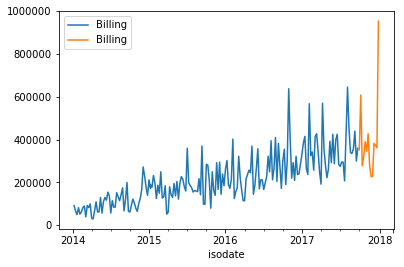

In [648]:
train50['Billing'].plot(legend=True)
test50['Billing'].plot(legend=True)

Apply model

In [649]:
model = SARIMAX(train50['Billing'],order=(3,1,2),seasonal_order=(0,0,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  189
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2391.899
Date:                Wed, 25 May 2022   AIC                           4795.798
Time:                        16:33:08   BIC                           4815.217
Sample:                    09-24-2017   HQIC                          4803.666
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9641      0.076    -12.758      0.000      -1.112      -0.816
ar.L2         -0.1535      0.117     -1.307      0.191      -0.384       0.077
ar.L3         -0.1084      0.088     -1.225      0.220      -0.282       0.065
ma.L1          0.1015      0.058      1.761      0.078      -0.011       0.214
ma.L2         -0.8559      0.049    -17.365      0.000      -0.953      -0.759
sigma2      6.188e+09   1.56e-11   3.97e+20      0.000    6.19e+09    6.19e+09
===================================================================================
Ljung-Box (Q):                       39.36   Jarque-Bera (JB):                83.73
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+36. Standard errors may be unstable.
"""

In [656]:
# start = len(train)
start = '2017-09-30'
# end = len(train) + len(test) - 1
end = '2017-12-24'

In [657]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

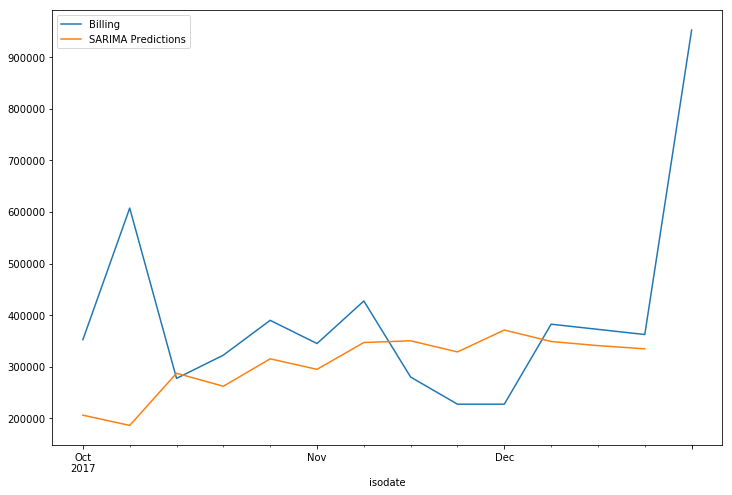

In [658]:
test50['Billing'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

Evaluate model

In [659]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test50['Billing'],predictions)
error

231261.31687132485

In [660]:
test50['Billing'].mean()

396538.46153846156

Forecast into the future

In [661]:
model = SARIMAX(df50['Billing'],order=(3,1,2),seasonal_order=(0,0,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                Billing   No. Observations:                  202
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2558.696
Date:                Wed, 25 May 2022   AIC                           5129.392
Time:                        16:35:05   BIC                           5149.211
Sample:                    12-31-2017   HQIC                          5137.412
                         - 01-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0488      0.488      0.100      0.920      -0.907       1.005
ar.L2         -0.1474      0.081     -1.827      0.068      -0.305       0.011
ar.L3         -0.1053      0.077     -1.364      0.173      -0.257       0.046
ma.L1         -0.9806      0.511     -1.919      0.055      -1.982       0.021
ma.L2          0.1121      0.462      0.243      0.808      -0.793       1.017
sigma2      6.887e+09   6.82e-11   1.01e+20      0.000    6.89e+09    6.89e+09
===================================================================================
Ljung-Box (Q):                       63.20   Jarque-Bera (JB):                88.36
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+36. Standard errors may be unstable.
"""

In [662]:
fcast = results.predict(start='2018-01-01',end='2018-04-01',typ='levels').rename('SARIMA Predictions')

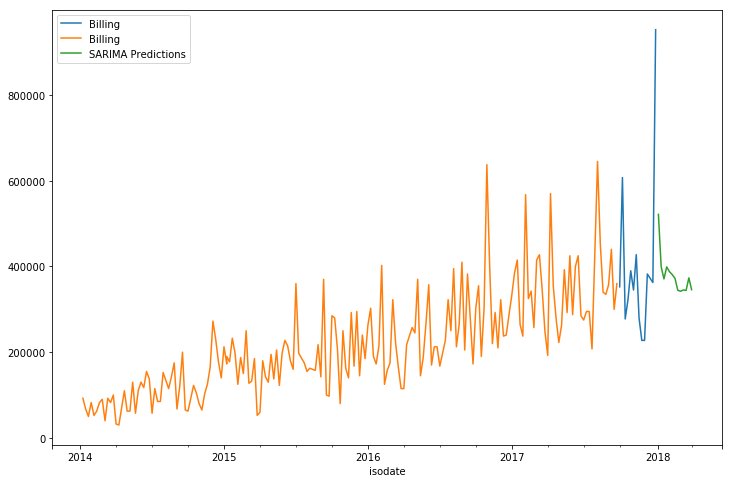

In [663]:
test50['Billing'].plot(legend=True,figsize=(12,8))
train50['Billing'].plot(legend=True)
fcast.plot(legend=True)

# Implement SARIMAX model

Auto_arima()

In [671]:
auto_arima(df50['Billing'],exogenous=df50[['Fc_and_order']],seasonal=True,m=52).summary()

C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\tammo\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  202
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1907.608
Date:                            Wed, 25 May 2022   AIC                           3827.217
Time:                                    23:10:21   BIC                           3845.281
Sample:                                         0   HQIC                          3834.556
                                            - 202                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.807e+04   9992.994     -1.809      0.070   -3.77e+04    1511.313
x1             0.7672      0.062     12.355      0.000       0.646       0.889
ar.L1          0.1750      0.103      1.702      0.089      -0.027       0.376
ar.S.L52      -0.7312      0.080     -9.101      0.000      -0.889      -0.574
ar.S.L104     -0.2790      0.096     -2.908      0.004      -0.467      -0.091
sigma2      8.697e+09      0.009   1.01e+12      0.000     8.7e+09     8.7e+09
===================================================================================
Ljung-Box (Q):                       24.87   Jarque-Bera (JB):                 6.05
Prob(Q):                              0.97   Prob(JB):                         0.05
Heteroskedasticity (H):               0.79   Skew:                            -0.06
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.94e+30. Standard errors may be unstable.
"""

Train and test dataset

In [672]:
train50 = df50['2017-09-30':]

In [673]:
test50 = df50[:'2017-09-30']

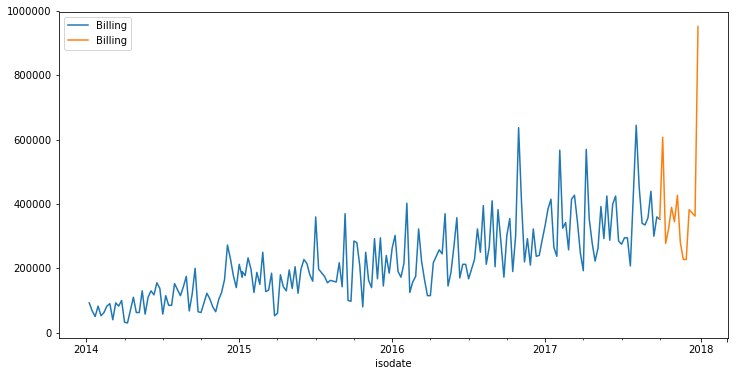

In [674]:
train50['Billing'].plot(figsize=(12,6),legend=True)
test50['Billing'].plot(legend=True)

In [677]:
model = SARIMAX(train50['Billing'],exog=train50['Fc_and_order'],orders=(1,0,0),seasonal_order=(2,1,0,52),enforce_invertibility=False)

result = model.fit()

In [678]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            Billing   No. Observations:                  190
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1745.173
Date:                            Wed, 25 May 2022   AIC                           3500.346
Time:                                    23:20:13   BIC                           3514.982
Sample:                                10-01-2017   HQIC                          3506.293
                                     - 01-12-2014                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fc_and_order     0.7541      0.076      9.892      0.000       0.605       0.903
ar.L1            0.1457      0.155      0.942      0.346      -0.157       0.449
ar.S.L52        -0.7953      0.165     -4.815      0.000      -1.119      -0.472
ar.S.L104       -0.2637      0.178     -1.478      0.139      -0.613       0.086
sigma2        8.941e+09   1.31e-11   6.84e+20      0.000    8.94e+09    8.94e+09
===================================================================================
Ljung-Box (Q):                       30.05   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.87   Prob(JB):                         0.48
Heteroskedasticity (H):               1.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.83e+37. Standard errors may be unstable.
"""

Apply model

In [717]:
# start = len(train)
start = '2017-09-30'
# end = len(train) + len(test) - 1
end = '2017-12-31'

In [718]:
predictions = result.predict(start,end,exog=test50[['Fc_and_order']]).rename('SARIMAX with exogenous')

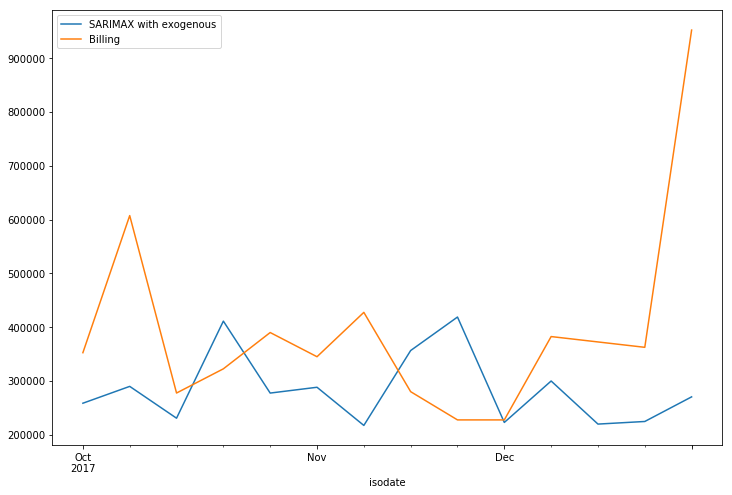

In [719]:
predictions.plot(figsize=(12,8),legend=True)
test50['Billing'].plot(legend=True)

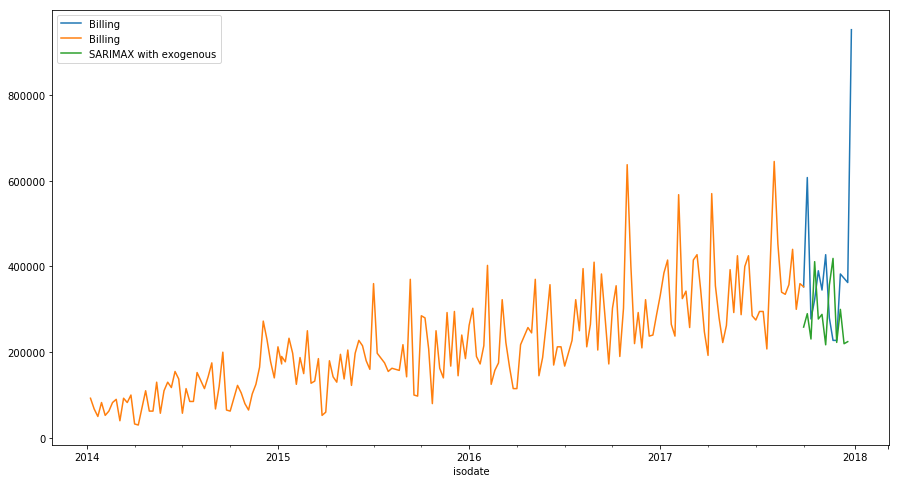

In [685]:
test50['Billing'].plot(legend=True,figsize=(15,8))
train50['Billing'].plot(legend=True)
predictions.plot(legend=True)

RMSE check

In [682]:
rmse(test50['Billing'],predictions)

243152.3935005611

In [683]:
test50['Billing'].mean()

396538.46153846156

Forecast into the future

In [687]:
model = SARIMAX(df50['Billing'],exog=df50['Fc_and_order'],orders=(1,0,0),seasonal_order=(2,1,0,52),enforce_invertibility=False)

In [688]:
results = model.fit()

In [709]:
exog_forecast = df50exo[:'2018-01-01'][['Fc_and_order']]

In [713]:
exog_forecast.head()

,Fc_and_order
isodate,
2018-01-01/2018-01-07,338477.0


In [711]:
fcast = result.predict('2018-01-01','2018-04-05',exog=exog_forecast).rename("FINAL SARIMAX FORECAST")

Plot results

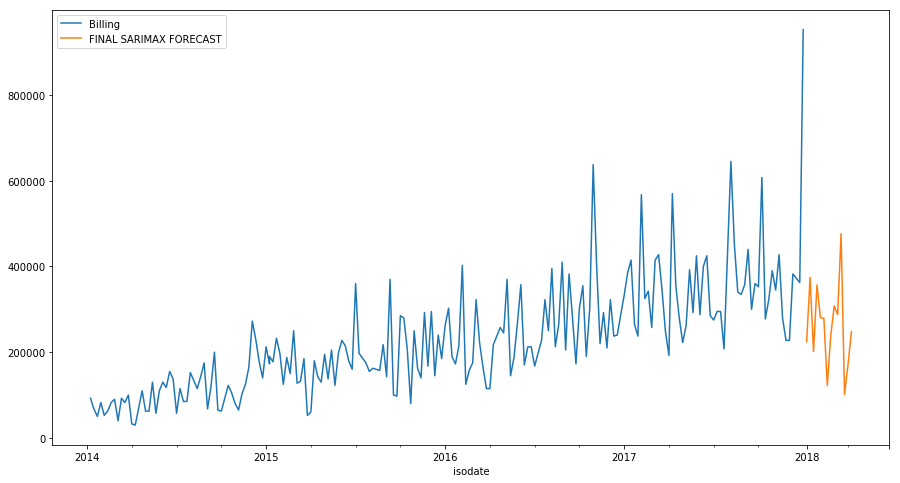

In [712]:
ax = df50['Billing'].loc['2018-01-01':].plot(figsize=(15,8),legend=True)
fcast.plot(legend=True)

# ARCHIVE

In [ ]:
def trainArima():

    train =
    test =
    print(f"ERROR IS:{error}")
    printf(error

# Drop duplicates

In [162]:
# test_data_ = test_data.loc[test_data['Sp_number']=='Product_19'].drop_duplicates(['Billing'])

In [163]:
# train_data_ = train_data.loc[train_data['Sp_number']=='Product_19'].drop_duplicates(['Billing'])

In [33]:
# df.drop_duplicates(['Billing'])

## Split data into training and test set

In [139]:
# TRAIN MODEL WITH THIS DATA
train_data = df['2017-09-30':]

In [4]:
# train_data.head()
# train_data.tail()

In [150]:
# ACTUAL VALUES FOR COMPARISON, test set should be as least as long as intended forecast
test_data = df['2017-12-31':'2017-09-30']

In [5]:
# test_data.head()
# test_data.tail()

## Evaluate model

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [35]:
# test_data['Billing'].describe()

In [86]:
# CALCULATE ROOT MEAN SQUARE ERROR
# np.sqrt(mean_squared_error(test_data,test_predictions))

In [89]:
# CALCULATE MEAN SQUARED ERROR
# mean_squared_error(test_data,test_predictions)

In [90]:
# CALCULATE MEAN ABSOLUTE ERROR
# mean_absolute_error(test_data,test_predictions)

## Exponential Smoothing

In [29]:
# fitted_model = ExponentialSmoothing(train_data_['Billing'],trend='mul',seasonal='mul',seasonal_periods=52).fit()

In [30]:
# test_predictions = fitted_model.forecast(13)

In [31]:
# test_predictions

In [32]:
# TRAIN DATA INCLUDED IN PLOT
# train_data_[['Billing']].plot(legend=True,label='TRAIN',figsize=(20,10))

In [33]:
# TEST DATA INCLUDED IN PLOT
# test_data_[['Billing']].plot(legend=True,label='TRAIN')

In [34]:
# PREDICTIONS INCLUDED IN PLOT
# test_predictions.plot(legend=True,label='Prediction')

In [36]:
# FORECAST INTO THE FUTURE
# final_model = ExponentialSmoothing(df['Billing'],trend='mul',seasonal='mul',seasonal_periods=13).fit()

In [37]:
# forecast_predictions = final_model.forecast(13)

In [38]:
# forecast_predictions.head()

In [193]:
def calculate_forecast(df):
    '''
    calculates forecasted values for the last 13 weeks specially for SARIMAX
    input: df with columns Fc_horizon, Fc_and_Order. Index format is ...
    output: df with an additional column Forecast
    '''
    df_ = df[:'2018-01-01/2018-01-07'].copy()
    dates = df_.index.unique()
    # print(len(dates),dates)
    horizons = df_.Fc_horizon.unique()
    counter = 13
    data = {}
    
    for date in dates:
        forecast = df_.Fc_and_order.loc[(df_.Fc_horizon == counter) & (df_.index == date)].values.tolist()
        counter-=1
        data[date] = forecast
        
    df__ = pd.DataFrame.from_dict(data, orient='index', columns=['Forecast_NEW'])
    df["NEW"] = df__['Forecast_NEW']
    df1 = df.loc[df['Fc_horizon'] == 1]
    df_new = df[df['NEW'].notna()].drop_duplicates(subset=['Fc_horizon'])
    df_conc = pd.concat([df1,df_new])
    df_conc.sort_index(ascending=False, inplace=True)
    df_conc['Fc_and_order'][df_conc['NEW'].notna()] = 0
    df_conc['NEW'][df_conc['NEW'].isna()] = 0
    # df_conc[df_conc['Billing'].isna()] = 0
    df_conc['Forecast'] = df_conc["Fc_and_order"] + df_conc['NEW']
    return df_conc[['Sp_number', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Forecast', 'Billing']]

df19_ = calculate_forecast(df19)
print(df19)

                        Sp_number  Due_date  Fc_horizon  Fc_date  \
isodate                                                            
2018-03-26/2018-04-01  Product_19    201813          13   201752   
2018-03-19/2018-03-25  Product_19    201812          13   201751   
2018-03-19/2018-03-25  Product_19    201812          12   201752   
2018-03-12/2018-03-18  Product_19    201811          13   201750   
2018-03-12/2018-03-18  Product_19    201811          12   201751   
...                           ...       ...         ...      ...   
2014-01-06/2014-01-12  Product_19    201401           5   201348   
2014-01-06/2014-01-12  Product_19    201401           4   201349   
2014-01-06/2014-01-12  Product_19    201401           3   201350   
2014-01-06/2014-01-12  Product_19    201401           2   201351   
2014-01-06/2014-01-12  Product_19    201401           1   201352   

                       Fc_and_order   Billing       NEW  
isodate                                                  